<div align="center">

**Lab Report Title**  
*Digital-to-Analog Converter*

**Course:** ELECTRONICS 2 

**Date:** 03/07/2025


**Group Members**

| Full Name                 | Matriculation No. |
| ------------------------- | ----------------- |
| Ashu Nkongho Tekoh        | 2756129           |
| Enes Gjana                | 2770615           |
| Elhama Adel               | 2756781           |


</div>

In [25]:
#Load all Import

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Objective
The main goal of this lab is to understand and implement signal conversion between digital and analog domains. This is achieved by:

- Using an **R-2R resistor network** to build a **Digital-to-Analog Converter (DAC)**.
- Using the DAC setup as the basis for creating an **Analog-to-Digital Converter (ADC)**.

## Requirements
- The lab **protocol must be prepared in advance**, so that only measurement results need to be added during the lab session.
- The **final version of the protocol must be submitted during the lab** via Moodle.
- The **last hour** of the lab is reserved for **finalizing the protocol**.
- A **discussion and feedback session** will be held at the end.

## Learning Outcomes
- Gain practical experience in **converting analog signals to digital** and vice versa.
- Develop a strong understanding of how the **R-2R DAC** works.
- Practice **real-time documentation** and **instant submission** of lab reports.
- Reflect on the experiment in a **feedback and lessons learned discussion**.

## Preparation 1

We should calculate R9, which is the reference resistor of this R-2R digital-to-analog converter. The output voltage is given by the formula:

$V_{out} = \frac{-V_{REF} \times Rf}{R} \times \sum_{i=0}^{i=N-1} \frac{Bi}{2^{N-i}}$

Where:

• $V_{REF}$ is the reference voltage.

• $N$ is the number of bits (here, $N = 4$).

• $D$ is the decimal equivalent of the binary input, calculated as: $D = 8b_3 + 4b_2 + 2b_1 + b_0$

• $I$ is the index of the bit, N number of bits and B is either 0 or 1.

When replacing $V_{OUT}$ with -4 V and $V_{REF}$ with 5 V for the full scale, which is 1111 as an input. We will get $R_9$ of 8.5333 kΩ.

## Lab Setup 1

In this lab, a Digital-to-Analog Converter (DAC) was implemented using an R-2R resistor network to convert digital inputs into analog voltages.

The circuit was built on a breadboard with a reference voltage of **VREF = 5V** and a target full-scale output of **VOUT = −4V**. The required resistor **R9** was calculated accordingly.

Theoretical output values **VOUT = f(d)** were derived for all digital inputs and compared with measured values taken using a **Fluke 8808A multimeter**. The differences between them were calculated to assess accuracy.

A **74HCT93 binary counter** was added to automate input values, driven by a clock signal from the **R&S HMF2550 frequency generator**. The resulting analog output was observed on a **Tektronix MDO3034 oscilloscope**.

Finally, the concept of **quantization error** was explained and calculated by comparing ideal and actual output levels.



| Decimal Value (D) | Binary Input [b₃b₂b₁b₀] | Calculated Voltage (V) | Measured Voltage (V) |
|:-----------------:|:----------------------:|:-------------------------:|:---------------:|
| 0 | 0000 | 0 | -0.150 | 
| 1 | 0001 | $\frac{-1}{32}R_9 = -0.2666$ V | -0.451 |
| 2 | 0010 | $\frac{-1}{16}R_9 = -0.5333$ V | -0.675 |
| 3 | 0011 | $\frac{-3}{32}R_9 = -0.8$ V | -0.975 |
| 4 | 0100 | $\frac{-1}{8}R_9 = -1.0666$ V | -1.160 |
| 5 | 0101 | $\frac{-5}{32}R_9 = -1.3333$ V | -1.460 |
| 6 | 0110 | $\frac{-3}{16}R_9 = -1.6$ V | -1.684 |
| 7 | 0111 | $\frac{-7}{32}R_9 = -1.8666$ V | -1.984 |
| 8 | 1000 | $\frac{-1}{4}R_9 = -2.1333$ V | -2.147 |
| 9 | 1001 | $\frac{-9}{32}R_9 = -2.4$ V | -2.448 |
| 10 | 1010 | $\frac{-5}{16}R_9 = -2.6666$ V | -2.672 |
| 11 | 1011 | $\frac{-11}{32}R_9 = -2.9333$ V | -2.972 |
| 12 | 1100 | $\frac{-3}{8}R_9 = -3.2$ V | -3.157 |
| 13 | 1101 | $\frac{-13}{32}R_9 = -3.4666$ V | -3.457 |
| 14 | 1110 | $\frac{-7}{16}R_9 = -3.7333$ V | -3.681 |
| 15 | 1111 | $\frac{-15}{32}R_9 = -4$ V | -3.980 |

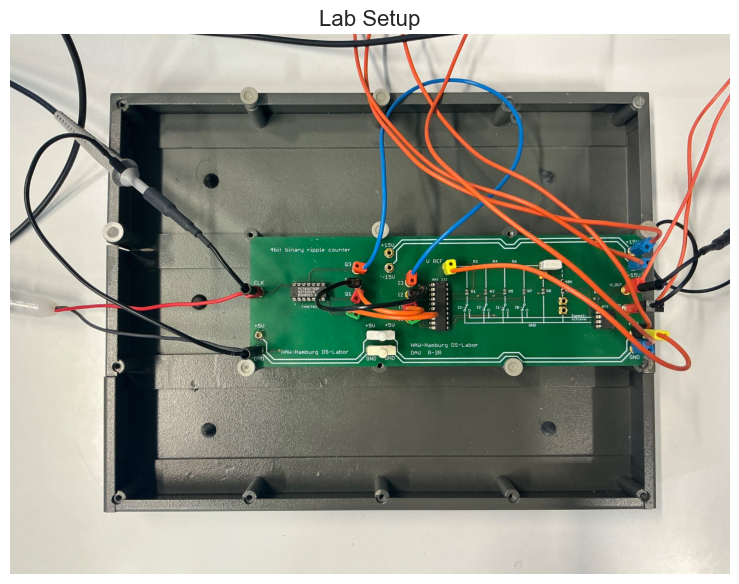

In [26]:
from components.data_visualizing import insert_circut_diagram

# change to TRUE is we have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_LTSPICE_CIRCUIT_AVAILABLE = True
img_path = '../images/el5lab.jpg'  # change string to name of the image
img_title = "Lab Setup" # Enter Image Title Here

if IS_LTSPICE_CIRCUIT_AVAILABLE:
    insert_circut_diagram(img_path=img_path,img_title=img_title)

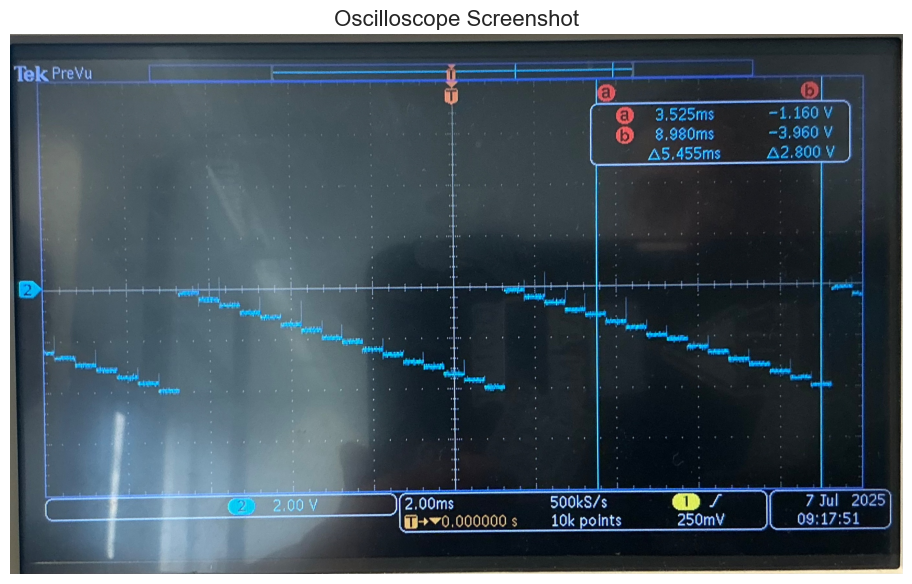

In [27]:
from components.data_visualizing import insert_circut_diagram

# change to TRUE is we have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_LTSPICE_CIRCUIT_AVAILABLE = True
img_path = '../images/adc_dac.jpg'  # change string to name of the image
img_title = "Oscilloscope Screenshot" # Enter Image Title Here

if IS_LTSPICE_CIRCUIT_AVAILABLE:
    insert_circut_diagram(img_path=img_path,img_title=img_title)

## Evaluation 1
In high frequencies we get a lot of voltage spikes(glitches), which are not good when we want to progaram a device, to get rid of the spikes we decrease the frequency, we keep it in the range from 1-2k Hz.

## Preparation 2.


**Input and Output Specifications** 

Input: The circuit receives an analog voltage signal from a sensor with a range of 0V to 4V. For this experiment, we will use a reference sensor voltage of 2.8V.

Output: The system generates a 4-bit digital representation (0000 to 1111) of the analog input voltage. This conversion is achieved through an analog-to-digital conversion process utilizing a comparator, DAC, and up/down counter.

**Circuit Operation with 2.8V Sensor Input**

The ADC circuit operates through the following sequence:

1. Sensor Signal Input: The 2.8V sensor signal is fed into the non-inverting input of the LM311 comparator.

2. DAC Reference Generation: A 4-bit up/down counter (74LS669) drives the DAC, which generates an analog reference voltage corresponding to the current binary count.

3. Voltage Comparison Process: The LM311 comparator continuously compares the DAC output against the sensor input:
- DAC output < sensor input: Comparator outputs HIGH → counter increments
- DAC output > sensor input: Comparator outputs LOW → counter decrements

4. Feedback Control: The counter adjusts its value based on the comparator output. When the DAC output surpasses 2.8V, the comparator triggers the counter to decrement, reducing the DAC output accordingly.

5. Steady-State Oscillation: The system reaches equilibrium by oscillating between two consecutive digital values that bracket the sensor voltage (for example, alternating between 1011 and 1100).
%% [markdown]
**Physical Circuit Implementation (Reference: Figures 2 and 5)**

**Power Supply Configuration**
Connect the following power rails to both PCBs:
- +5V supply rail
- -15V supply rail
- Ground reference

**Signal Interconnections**
- Sensor to Comparator: Route the sensor output (2.8V) to the LM311 non-inverting input
- DAC to Comparator: Connect the DAC analog output to the LM311 inverting (reference) input
- Counter to DAC: Wire the 4-bit counter output directly to the DAC input lines

**Timing and Control**
- Clock Source: Supply a stable TTL-compatible clock signal to drive the counter (use either onboard oscillator or external clock generator)
- Direction Control: Connect the UP/DOWN control pin of the counter to the LM311 comparator output to enable automatic counting direction control

**Observation**
- Connect output pins or LEDs to observe the 4-bit output. With
 2.8V input, digital output will toggle between values (approx. 1011 and 1100).

## Lab Setup 2
**Power Supply Configuration**
The power connections for both printed circuit boards were established first. The +5V power rail was connected to both PCBs, ensuring a stable positive voltage supply for the digital components. The -15V power rail was connected to provide the negative supply required by the operational amplifiers. Ground connections were established across all circuit boards to create a common reference point for all measurements.

**Signal Interconnections**
Following the power connections, the signal wiring was completed. The sensor output, set to 2.8V, was connected directly to the non-inverting input of the LM311 comparator. The DAC analog output was wired to the inverting input of the LM311, creating the reference voltage for comparison. The 4-bit counter output lines were carefully routed to the corresponding DAC input pins, ensuring proper bit alignment. To complete the feedback loop, the LM311 comparator output was connected to the UP/DOWN control pin of the counter.

**Clock and Control Setup**
A stable TTL-compatible clock signal was provided to drive the counter operation. The clock frequency was set to ensure stable operation without causing excessive oscillation. All control signals were verified to be properly routed, and the counter direction control was confirmed to be correctly connected to respond to the comparator output.

**Final Verification**
Before powering up the complete system, all connections were double-checked using the circuit diagrams. The power supply voltages were verified to be within specification and all signal paths were confirmed to be correctly established. The setup was then ready for the experimental measurements.

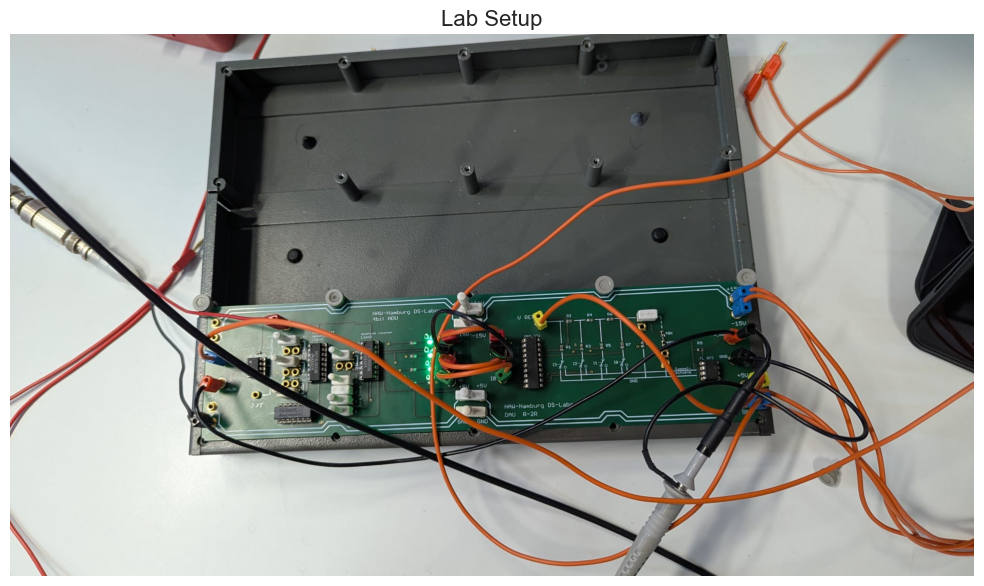

In [28]:
from components.data_visualizing import insert_circut_diagram

# change to TRUE is we have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_LTSPICE_CIRCUIT_AVAILABLE = True
img_path = '../images/el5_task2setup.jpg'  # change string to name of the image
img_title = "Lab Setup" # Enter Image Title Here

if IS_LTSPICE_CIRCUIT_AVAILABLE:
    insert_circut_diagram(img_path=img_path,img_title=img_title)

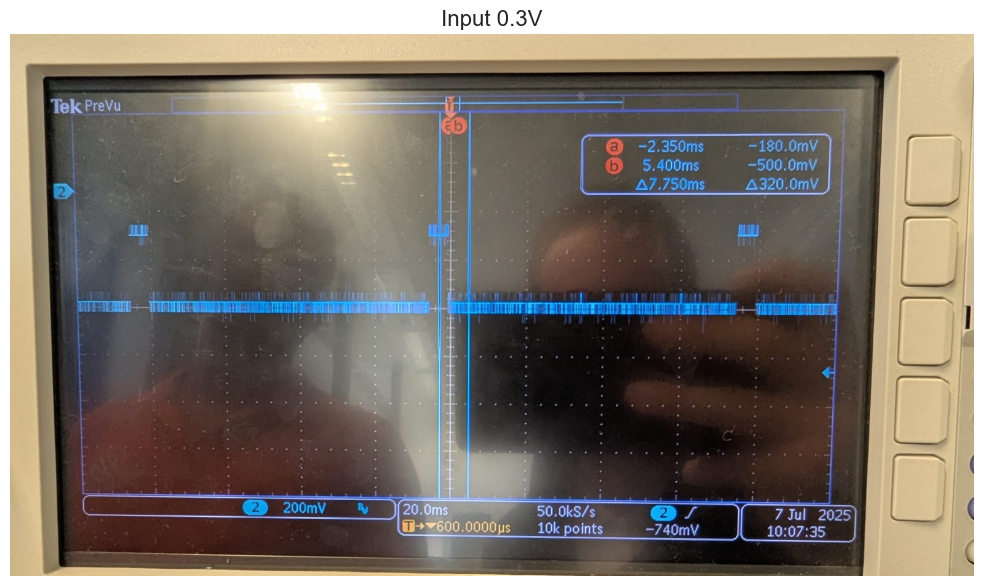

In [29]:
from components.data_visualizing import insert_circut_diagram

# change to TRUE is we have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_LTSPICE_CIRCUIT_AVAILABLE = True
img_path = '../images/el5_task2_0V.jpg'  # change string to name of the image
img_title = "Input 0.3V" # Enter Image Title Here

if IS_LTSPICE_CIRCUIT_AVAILABLE:
    insert_circut_diagram(img_path=img_path,img_title=img_title)

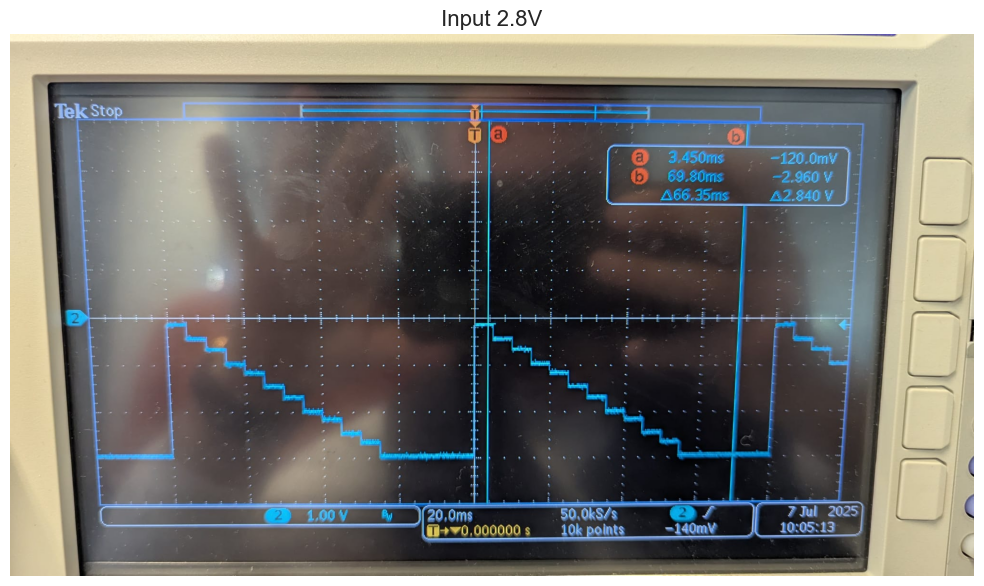

In [30]:
from components.data_visualizing import insert_circut_diagram

# change to TRUE is we have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_LTSPICE_CIRCUIT_AVAILABLE = True
img_path = '../images/el5_task2_2.8V.jpg'  # change string to name of the image
img_title = "Input 2.8V" # Enter Image Title Here

if IS_LTSPICE_CIRCUIT_AVAILABLE:
    insert_circut_diagram(img_path=img_path,img_title=img_title)

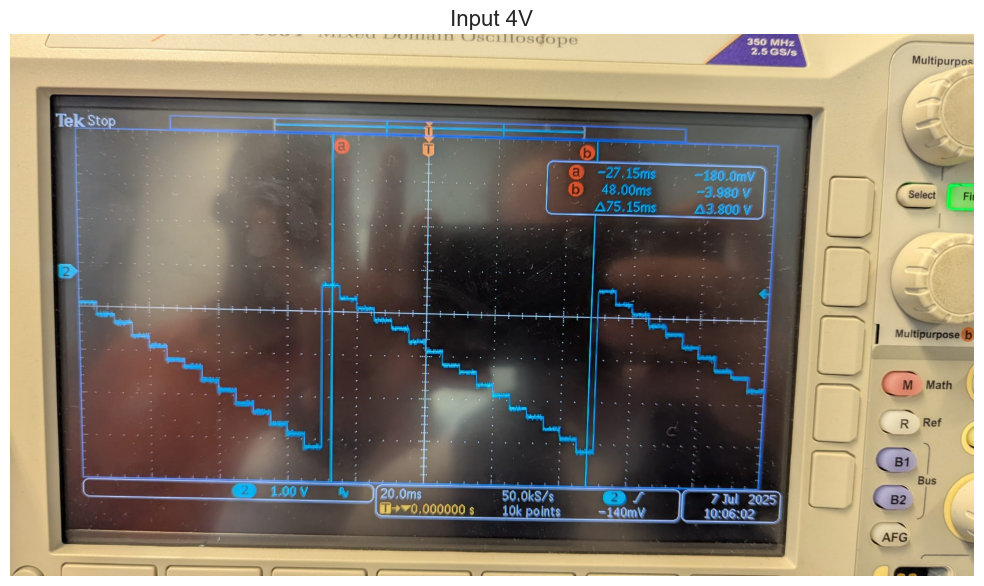

In [31]:
from components.data_visualizing import insert_circut_diagram

# change to TRUE is we have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_LTSPICE_CIRCUIT_AVAILABLE = True
img_path = '../images/el5_task2_5V.jpg'  # change string to name of the image
img_title = "Input 4V" # Enter Image Title Here

if IS_LTSPICE_CIRCUIT_AVAILABLE:
    insert_circut_diagram(img_path=img_path,img_title=img_title)

## Evaluation 2
**Lessons learned**
- Testing under practical conditions is essential to understand the real-world behavior of DAC/ADC circuits.  
- Pre-simulating setups and using templates improves efficiency during lab work.  
- Clear step-by-step documentation reduces confusion during assembly and debugging.